# Advertising Sales Channel Prediction

In [42]:
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Data Cleaning

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

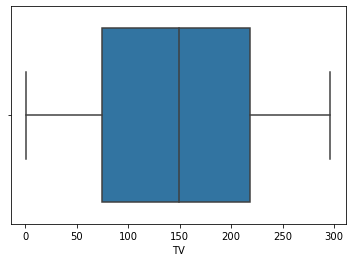

In [9]:
# Now we are looking for outliers in the dataset

df1=sns.boxplot(df['TV'])

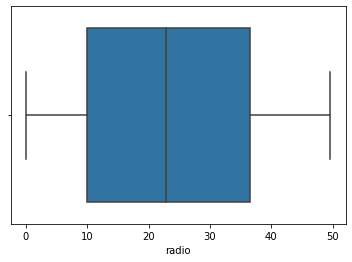

In [10]:
df2=sns.boxplot(df['radio'])

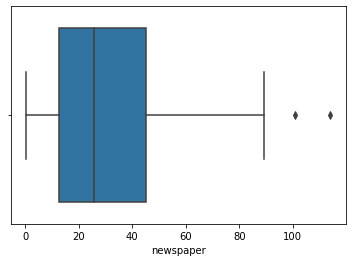

In [11]:
df3=sns.boxplot(df['newspaper'])

In [12]:
# There are no considerable outliers present in the data.

In [13]:
# Sales is our Targt column.So, we have to check outliers in the data for Sales column.

<AxesSubplot:xlabel='sales'>

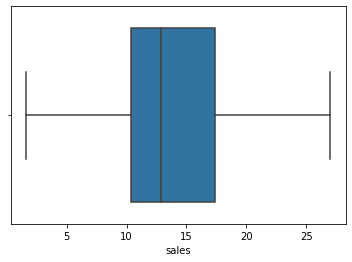

In [14]:
sns.boxplot(df['sales'])

Now let's check how sales(target) column relating to other variables.

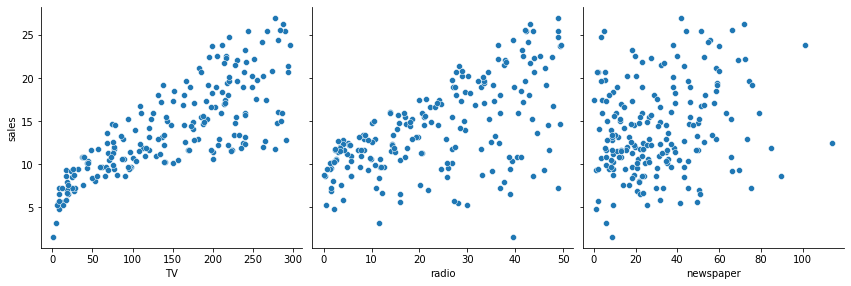

In [15]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

Now, I will check the correlation between these variables.

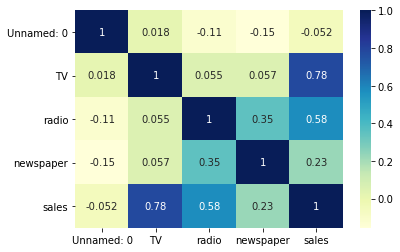

In [16]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

Now, I am going to perform Simple Linear Regression

In [17]:
x=df['TV']
y=df['sales']

Now, I am performing splitting into Train & Test Values.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5, test_size = 0.2, random_state = 82)

In [19]:
x_train.head()

82      75.3
141    193.7
13      97.5
177    170.2
30     292.9
Name: TV, dtype: float64

In [20]:
y_train.head()

82     11.3
141    19.2
13      9.7
177    11.7
30     21.4
Name: sales, dtype: float64

In [21]:
 # I have to import statsmodels.api

import statsmodels.api as s

In [23]:
x_train_s = s.add_constant(x_train)

In [28]:
# I am fitting the resgression line using 'OLS'
lr = s.OLS(y_train, x_train_s).fit()

In [29]:
lr.params

const    6.929153
TV       0.050007
dtype: float64

In [30]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

In [31]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     196.0
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           4.10e-25
Time:                        13:44:55   Log-Likelihood:                -256.70
No. Observations:                 100   AIC:                             517.4
Df Residuals:                      98   BIC:                             522.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9292      0.613     11.302      0.0

The coefficient for TV is 0.050, with a very low p value

R - squared is 0.667

 F statistic has a very low p value 

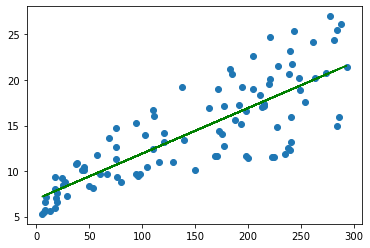

In [35]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.929 + 0.050*x_train, 'g')
plt.show()

# Model

We need to check if the error terms are also normally distributed

In [37]:
y_train_pred = lr.predict(x_train_s)
res = (y_train - y_train_pred)

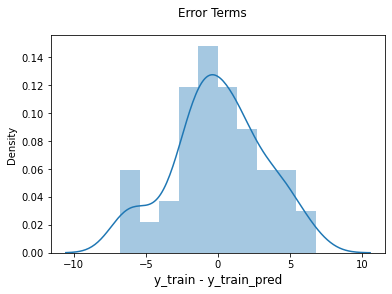

In [39]:
fig = plt.figure()
sns.distplot(res, bins = 10)
fig.suptitle('Error Terms', fontsize = 12)
plt.xlabel('y_train - y_train_pred', fontsize = 12)
plt.show()

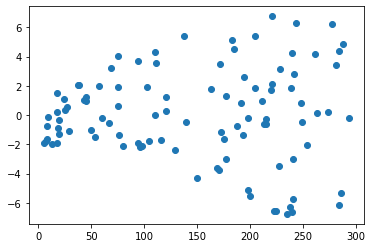

In [41]:
plt.scatter(x_train,res) # looking for pattern in the residuals.
plt.show()

As you can see, the regression line is a pretty good fit to the data

In [45]:
# Add a constant to x_test
x_test_s = s.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_s)

In [47]:
y_pred.head()

86     10.744724
151    12.980058
130     6.964158
116    13.890194
18     10.389671
dtype: float64

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.671613164779858

checking the R-squared on the test set

In [48]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.400861015617487

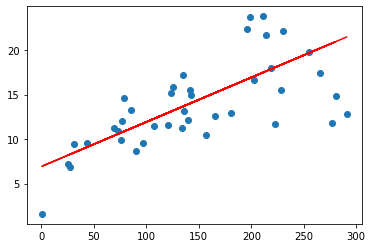

In [49]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.929 + 0.050 * x_test, 'r')
plt.show()